In [1]:
# READ NECESSARY PACKAGES
%matplotlib inline
import matplotlib
from matplotlib.pyplot import figure,show
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
from yahoo_finance import Share
from pandas import DataFrame, read_csv, Series
import pandas as pd
import os
import time
from dateutil.parser import parse
from matplotlib.patches import Ellipse
import numpy as np
import math
import copy
import QSTK.qstkutil.qsdateutil as du
import datetime as dt
import QSTK.qstkutil.DataAccess as da
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkstudy.EventProfiler as ep

# Create data object from Yahoo real-time data that is compatible with QSTK

In [2]:
tickers = ["NUOT","AMBS","CUR"]
today = time.strftime("%Y-%m-%d")
startdate = '2014-01-01'
enddate = '2014-12-31'

stocks = []
for ticker in tickers:
    stocks.append(Share(ticker))

historical_data = []
for stock in stocks:
    historical_data.append(stock.get_historical(startdate,enddate))

yahooF_keys = ['Adj_Close','Close','High','Low','Open','Volume']

In [3]:
# Make list of values to be used later for constructing appropriate data frames
def makeListFromYFkey(stock_historical_data,yahooF_key):
    l = []
    for i in range(len(stock_historical_data)):
        l.append(round(float(stock_historical_data[i][yahooF_key]),2))
    return l

def makeListOfDates(stock_historical_data):
    d = []
    for i in range(len(stock_historical_data)):
        d.append(stock_historical_data[i]['Date'])
    return d

In [4]:
# Create Universal Time Stamps
trading_dates = makeListOfDates(historical_data[0])
time_stamps = []
for date in trading_dates:
    time_stamps.append(pd.tslib.Timestamp(date + ' 16:00:00')) 
time_stamps = time_stamps[-1::-1]
    
# Create Dataframes for a specific Key for all stocks
def makeDataFrameFromYFkey(yahooF_key):
    data = {} 
    for i in range(len(tickers)):
        l = makeListFromYFkey(historical_data[i],yahooF_key)
        data[tickers[i]] = Series(l, index=time_stamps)
    df = DataFrame(data)
    return df.sort_index()

In [5]:
# Create Dictionary of DataFrames as required by QSTK
list_dataframes = []
for k in yahooF_keys:
    list_dataframes.append(makeDataFrameFromYFkey(k))

# This is the final data you can use with the QSTK library
qstk_data = dict(zip(yahooF_keys,list_dataframes))
for s_key in yahooF_keys:
    qstk_data[s_key] = qstk_data[s_key].fillna(method='ffill')
    qstk_data[s_key] = qstk_data[s_key].fillna(method='bfill')
    qstk_data[s_key] = qstk_data[s_key].fillna(1.0)

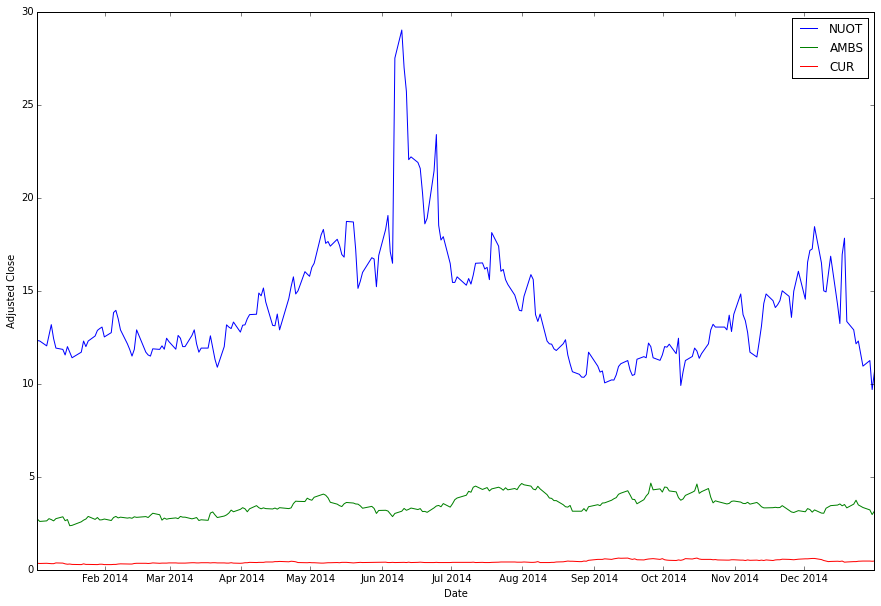

In [6]:
# First Figure
na_price = qstk_data['Adj_Close'].values
plt.clf()
plt.figure(figsize=(15,10))
plt.plot(time_stamps, na_price)
plt.legend(tickers)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

In [7]:
na_normalized_price = na_price / na_price[0, :]

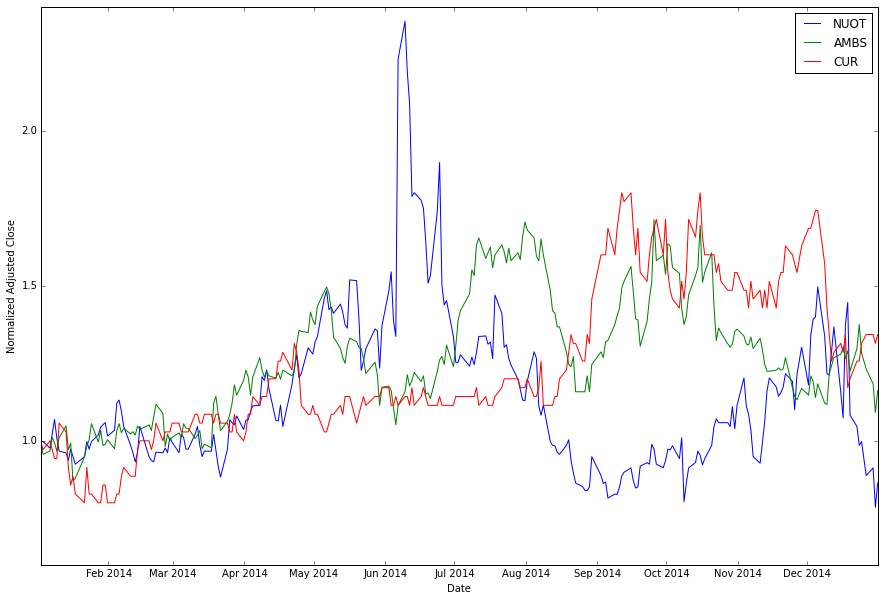

In [8]:
# Second Figure
plt.figure(figsize=(15,10))
plt.plot(time_stamps, na_normalized_price)
plt.legend(tickers)
plt.ylabel('Normalized Adjusted Close')
plt.xlabel('Date')

In [9]:
na_normalized_price

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.99756691,  0.95588235,  0.97142857],
       [ 0.97648013,  0.96691176,  1.        ],
       [ 1.02189781,  1.01102941,  0.97142857],
       [ 1.06893755,  0.99264706,  0.94285714],
       [ 1.0081103 ,  0.96691176,  0.94285714],
       [ 0.96674777,  1.01102941,  1.05714286],
       [ 0.96107056,  1.04779412,  1.02857143],
       [ 0.93673966,  0.97058824,  0.91428571],
       [ 0.97323601,  0.99264706,  0.85714286],
       [ 0.94890511,  0.87132353,  0.88571429],
       [ 0.92457421,  0.87867647,  0.82857143],
       [ 0.94890511,  0.94852941,  0.8       ],
       [ 0.99756691,  0.98161765,  0.91428571],
       [ 0.97323601,  1.00367647,  0.82857143],
       [ 0.99756691,  1.05514706,  0.82857143],
       [ 1.01946472,  0.99632353,  0.8       ],
       [ 1.04379562,  1.03308824,  0.8       ],
       [ 1.05190592,  0.98529412,  0.85714286],
       [ 1.05839416,  0.98897059,  0.85714286],
       [ 1.01540957,  1.00367647,  0.8  

In [10]:
na_rets = na_normalized_price.copy()
tsu.returnize0(na_rets)

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00243309, -0.04411765, -0.02857143],
       [-0.02113821,  0.01153846,  0.02941176],
       [ 0.04651163,  0.04562738, -0.02857143],
       [ 0.04603175, -0.01818182, -0.02941176],
       [-0.0569044 , -0.02592593,  0.        ],
       [-0.04102977,  0.04562738,  0.12121212],
       [-0.00587248,  0.03636364, -0.02702703],
       [-0.02531646, -0.07368421, -0.11111111],
       [ 0.03896104,  0.02272727, -0.0625    ],
       [-0.025     , -0.12222222,  0.03333333],
       [-0.02564103,  0.00843882, -0.06451613],
       [ 0.02631579,  0.07949791, -0.03448276],
       [ 0.05128205,  0.03488372,  0.14285714],
       [-0.02439024,  0.02247191, -0.09375   ],
       [ 0.025     ,  0.05128205,  0.        ],
       [ 0.02195122, -0.05574913, -0.03448276],
       [ 0.02386635,  0.03690037,  0.        ],
       [ 0.00777001, -0.04626335,  0.07142857],
       [ 0.00616808,  0.00373134,  0.        ],
       [-0.04061303,  0.01486989, -0.066

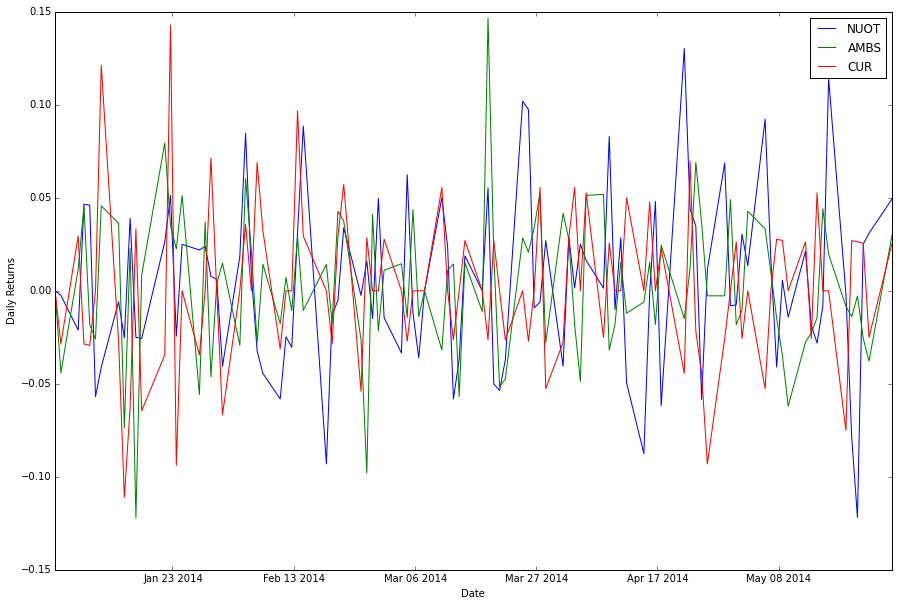

In [11]:
# Third Figure
plt.figure(figsize=(15,10))
plt.plot(time_stamps[0:100], na_rets[0:100,0::])
plt.legend(tickers[0::])
plt.ylabel('Daily Returns')
plt.xlabel('Date')